In [3]:
from __future__ import absolute_import, division, print_function
import numpy as np
import tensorflow as tf
import tensorflow_probability as tfprob
import seaborn as sns
sns.set(color_codes=True)

import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
tf.enable_eager_execution()

In [4]:
def print_subclasses_from_module(module, base_class, maxwidth=80):
  import functools, inspect, sys
  subclasses = [name for name, obj in inspect.getmembers(module)
                if inspect.isclass(obj) and issubclass(obj, base_class)]
  def red(acc, x):
    if not acc or len(acc[-1]) + len(x) + 2 > maxwidth:
      acc.append(x)
    else:
      acc[-1] += ", " + x
    return acc
  print('\n'.join(functools.reduce(red, subclasses, [])))

In [2]:
dist = tfprob.distributions.Normal(name='normal',loc=0,scale=1)

In [20]:
x = tf.lin_space(0.0,1.0,1000,)
y =dist.sample(10000)

In [21]:
print(dist.log_prob(.1))

tf.Tensor(-0.9239385, shape=(), dtype=float32)


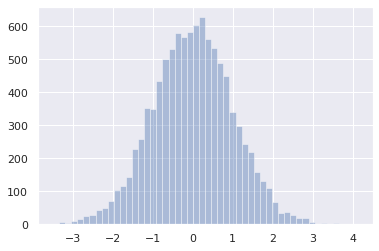

In [22]:
y =dist.sample(10000)
sns.distplot(y,kde=False)

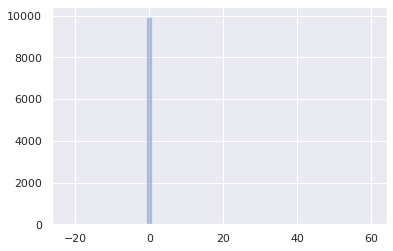

In [41]:

studentt = tfprob.distributions.StudentT(df=1,loc=0,scale=.01,)
y =studentt.sample(10000)
sns.distplot(y,kde=False)

In [44]:
print_subclasses_from_module(tfprob.distributions,tfprob.distributions.Distribution)

Autoregressive, BatchReshape, Bernoulli, Beta, Binomial, Categorical, Cauchy
Chi, Chi2, Chi2WithAbsDf, ConditionalDistribution
ConditionalTransformedDistribution, Deterministic, Dirichlet
DirichletMultinomial, Distribution, ExpRelaxedOneHotCategorical, Exponential
Gamma, GammaGamma, GaussianProcess, GaussianProcessRegressionModel, Geometric
Gumbel, HalfCauchy, HalfNormal, HiddenMarkovModel, Horseshoe, Independent
InverseGamma, InverseGammaWithSoftplusConcentrationRate, InverseGaussian
Kumaraswamy, LKJ, Laplace, LinearGaussianStateSpaceModel, LogNormal, Logistic
Mixture, MixtureSameFamily, Multinomial, MultivariateNormalDiag
MultivariateNormalDiagPlusLowRank, MultivariateNormalDiagWithSoftplusScale
MultivariateNormalFullCovariance, MultivariateNormalLinearOperator
MultivariateNormalTriL, MultivariateStudentTLinearOperator, NegativeBinomial
Normal, OneHotCategorical, Pareto, Poisson, PoissonLogNormalQuadratureCompound
QuantizedDistribution, RelaxedBernoulli, RelaxedOneHotCategorical, Sin

In [67]:
d = tfprob.distributions.Normal([0,2,4],1)

In [68]:
data = d.sample(1000)

In [53]:
d.log_prob([.1,.1,.1])

<tf.Tensor: id=994, shape=(3,), dtype=float32, numpy=array([  -0.9239385,  -49.923935 , -111.923935 ], dtype=float32)>

In [63]:
xs = np.linspace(0,1,200)

In [66]:
try:
    xsn = d.log_prob(xs)
except Exception as e:
    print(e)

Incompatible shapes: [200] vs. [3] [Op:Sub] name: Normal/log_prob/standardize/sub/


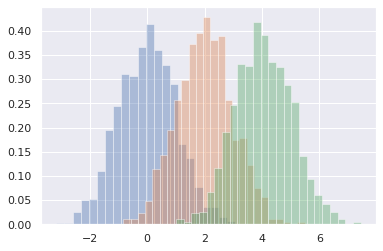

In [74]:
for k in range(3):
    sns.distplot(data[:,k],norm_hist=True,kde=False)

In [93]:
mvn = tfprob.distributions.MultivariateNormalDiag([0,0],[.2,.3])

In [94]:
samples = mvn.sample(1000)

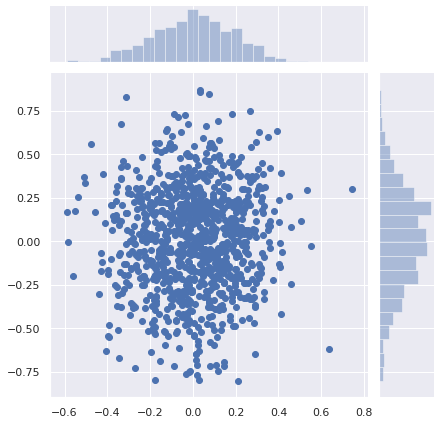

In [95]:
sns.jointplot(samples[:,0], samples[:,1],kind='scatter')

In [96]:
lkj = tfprob.distributions.LKJ(dimension=10,concentration=[1.5,3])

In [103]:
samples = lkj.sample()

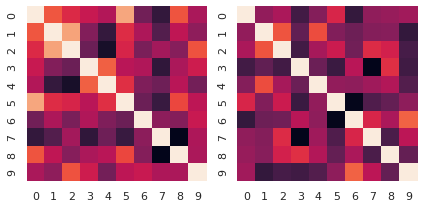

In [117]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(6, 3))
sns.heatmap(samples[0,...],ax=axes[0],cbar=False)
sns.heatmap(samples[1,...],ax=axes[1],cbar=False)
plt.tight_layout()
plt.show()

In [129]:
[module for module in dir(tfprob.positive_semidefinite_kernels) if not module.startswith("__")]

['ExpSinSquared',
 'ExponentiatedQuadratic',
 'Linear',
 'MaternFiveHalves',
 'MaternOneHalf',
 'MaternThreeHalves',
 'Polynomial',
 'PositiveSemidefiniteKernel',
 'RationalQuadratic',
 '_allowed_symbols']

In [131]:

kernel  = tfprob.positive_semidefinite_kernels.ExponentiatedQuadratic()

In [136]:
xs = np.linspace(-5.0,5.0,200).reshape([-1,1])
gp = tfprob.distributions.GaussianProcess(kernel=kernel,index_points=xs)

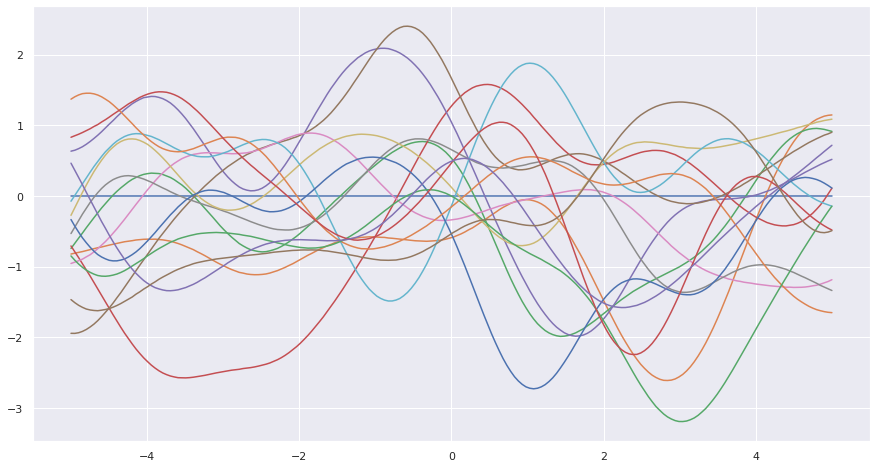

In [149]:
plt.figure(figsize=(15,8))
plt.plot(xs,gp.mean())
for k in range(15):
    plt.plot(xs,gp.sample())

In [170]:
obs_x = [[-4],[4],[1],[2],[-1]]
obs_y = [-1,2,1,3,0]

In [171]:
gprm  = tfprob.distributions.GaussianProcessRegressionModel(kernel,xs,obs_x,obs_y)

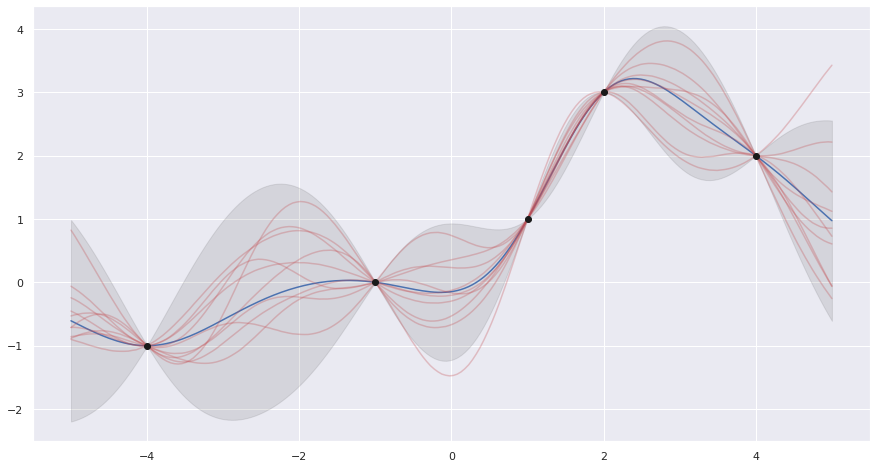

In [176]:
plt.figure(figsize=(15,8))

upper, lower = gprm.mean() + [2 * gprm.stddev(), -2 * gprm.stddev()]
plt.plot(xs, gprm.mean())
plt.fill_between(xs[..., 0], upper, lower, color='k', alpha=.1)
#plt.fill_between(xs[..., 0], upper, lower, color='k', alpha=.1)
for _ in range(10):
  plt.plot(xs, gprm.sample(), c='r', alpha=.3)
plt.scatter(obs_x, obs_y, c='k', zorder=3)
plt.show()

In [179]:
print_subclasses_from_module(tfprob.bijectors, tfprob.bijectors.Bijector)


AbsoluteValue, Affine, AffineLinearOperator, AffineScalar, BatchNormalization
Bijector, Chain, CholeskyOuterProduct, CholeskyToInvCholesky
ConditionalBijector, DiscreteCosineTransform, Exp, Expm1, FillTriangular, Gumbel
Identity, Inline, Invert, Kumaraswamy, MaskedAutoregressiveFlow
MatrixInverseTriL, MatvecLU, NormalCDF, Ordered, Permute, PowerTransform
RealNVP, Reciprocal, Reshape, ScaleTriL, Sigmoid, SinhArcsinh, SoftmaxCentered
Softplus, Softsign, Square, Tanh, TransformDiagonal, Transpose, Weibull


In [5]:
print_subclasses_from_module(tfprob.positive_semidefinite_kernels,tfprob.positive_semidefinite_kernels.PositiveSemidefiniteKernel)

ExpSinSquared, ExponentiatedQuadratic, Linear, MaternFiveHalves, MaternOneHalf
MaternThreeHalves, Polynomial, PositiveSemidefiniteKernel, RationalQuadratic
